## Problem Description:
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, **this competition challenges to predict the final price of each home.**

## About Data:
* train.csv - the training set
* test.csv - the test set
* data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
* sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

## Data Description:

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

## Note:
* While reading the data set we have considered 'NaN' as NAs.

## Evaluation Metric:
* The evaluation metric is **Root-Mean-Squared-Error (RMSE)**

In [1]:
import pandas as pd
import numpy as np

from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv',header=0)
test = pd.read_csv('test.csv', header = 0)
sample_submission = pd.read_csv('sample_submission.csv',header = 0)

In [3]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [7]:
print(train.shape)
print(test.shape)
print(sample_submission.shape)

(1460, 81)
(1459, 80)
(1459, 2)


In [8]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

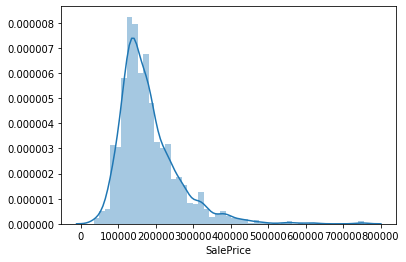

In [9]:
#histogram
sns.distplot(train['SalePrice']);

* Deviate from the normal distribution.
* Have appreciable positive skewness.
* Show peakedness.

### Relationship with numerical variables

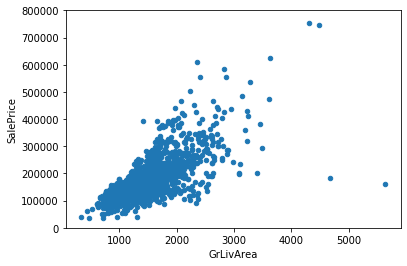

In [10]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

It seems that 'SalePrice' and 'GrLivArea' are in linear relationship.

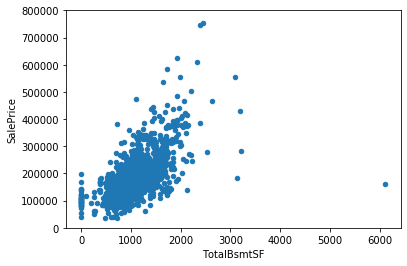

In [11]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

'TotalBsmtSF' and 'SalePrice' are also in Liner relation

### Relationship with categorical features

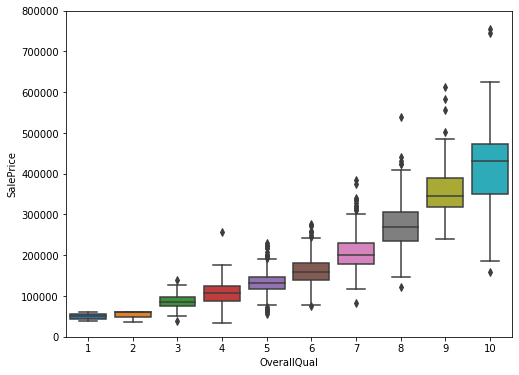

In [12]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

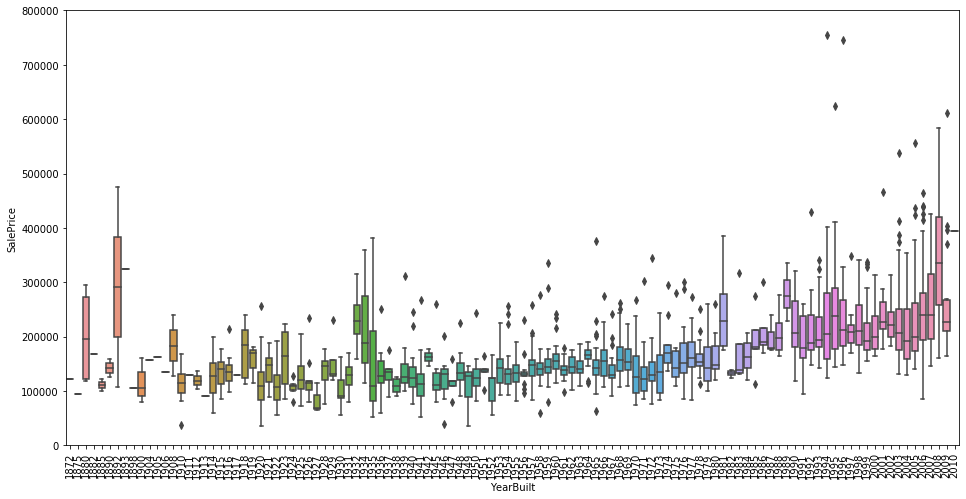

In [13]:
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

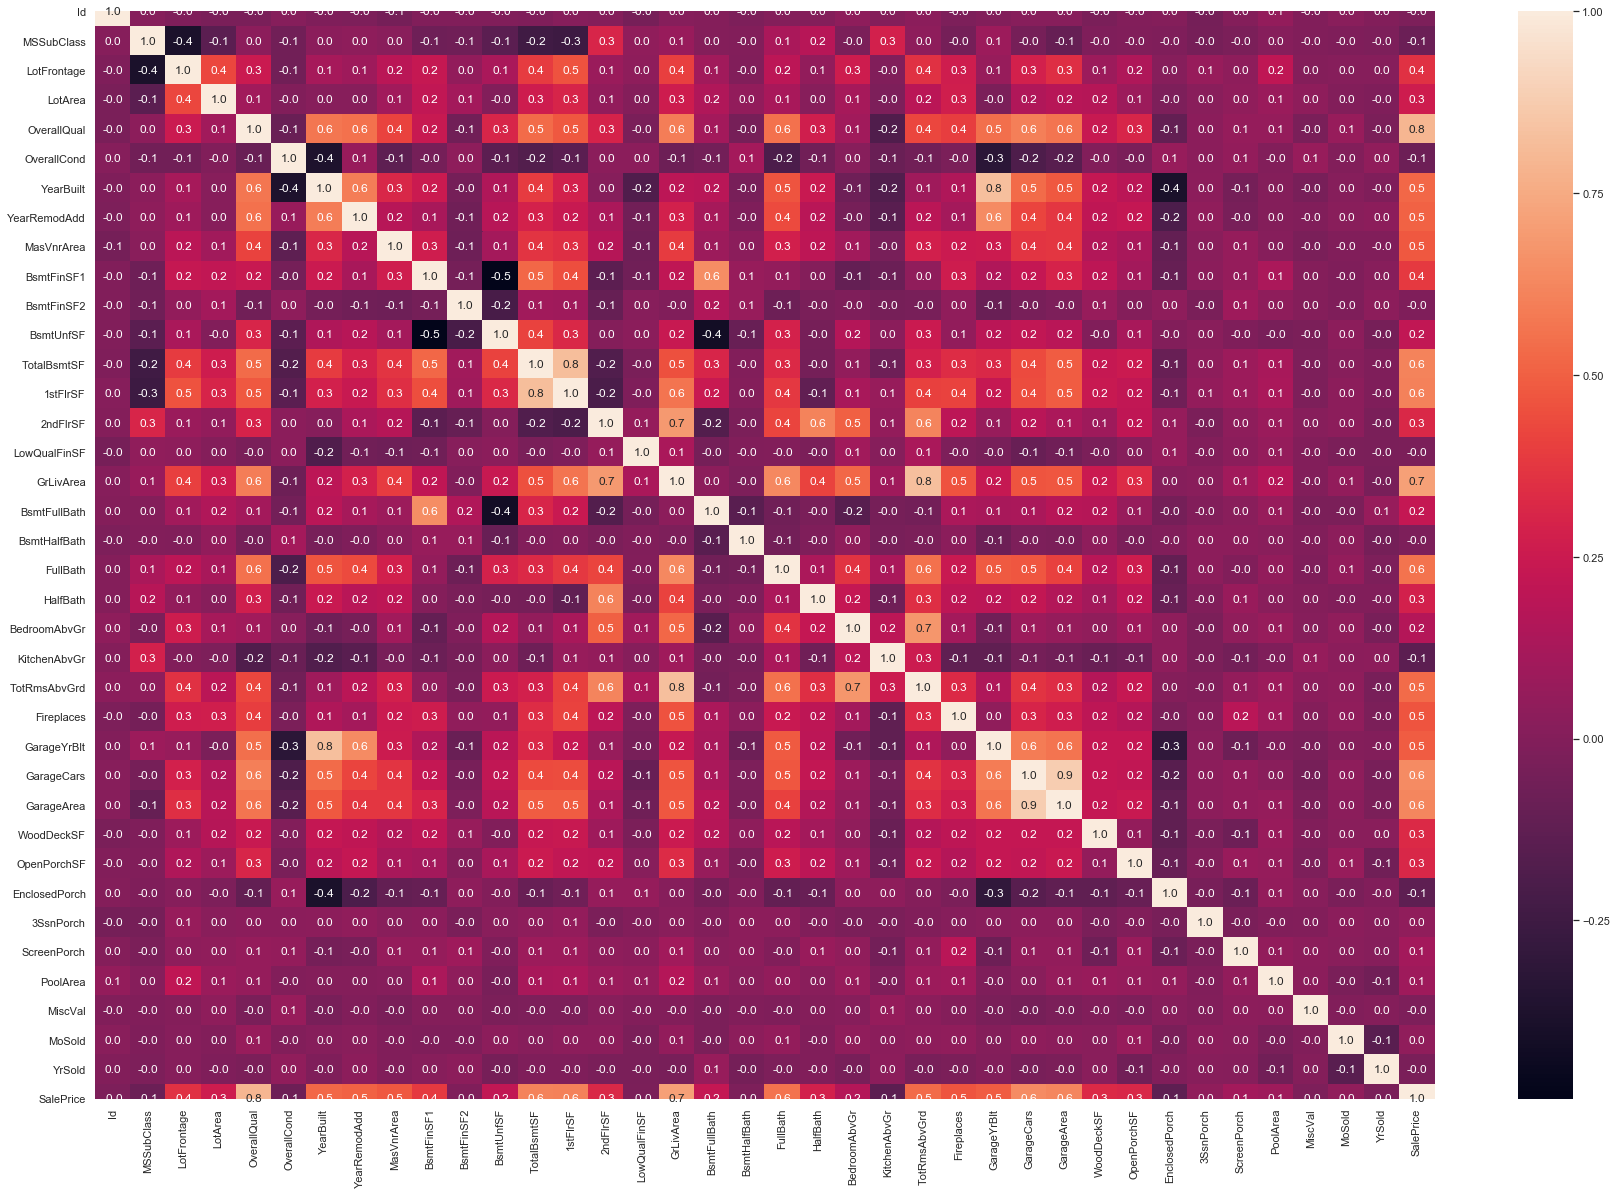

In [14]:
sns.set(font_scale=1)
correlation_train=train.corr()
plt.figure(figsize=(30,20))
sns.heatmap(correlation_train,annot=True,fmt='.1f')

In [15]:
train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

### Scatter plots between 'SalePrice' and correlated variables

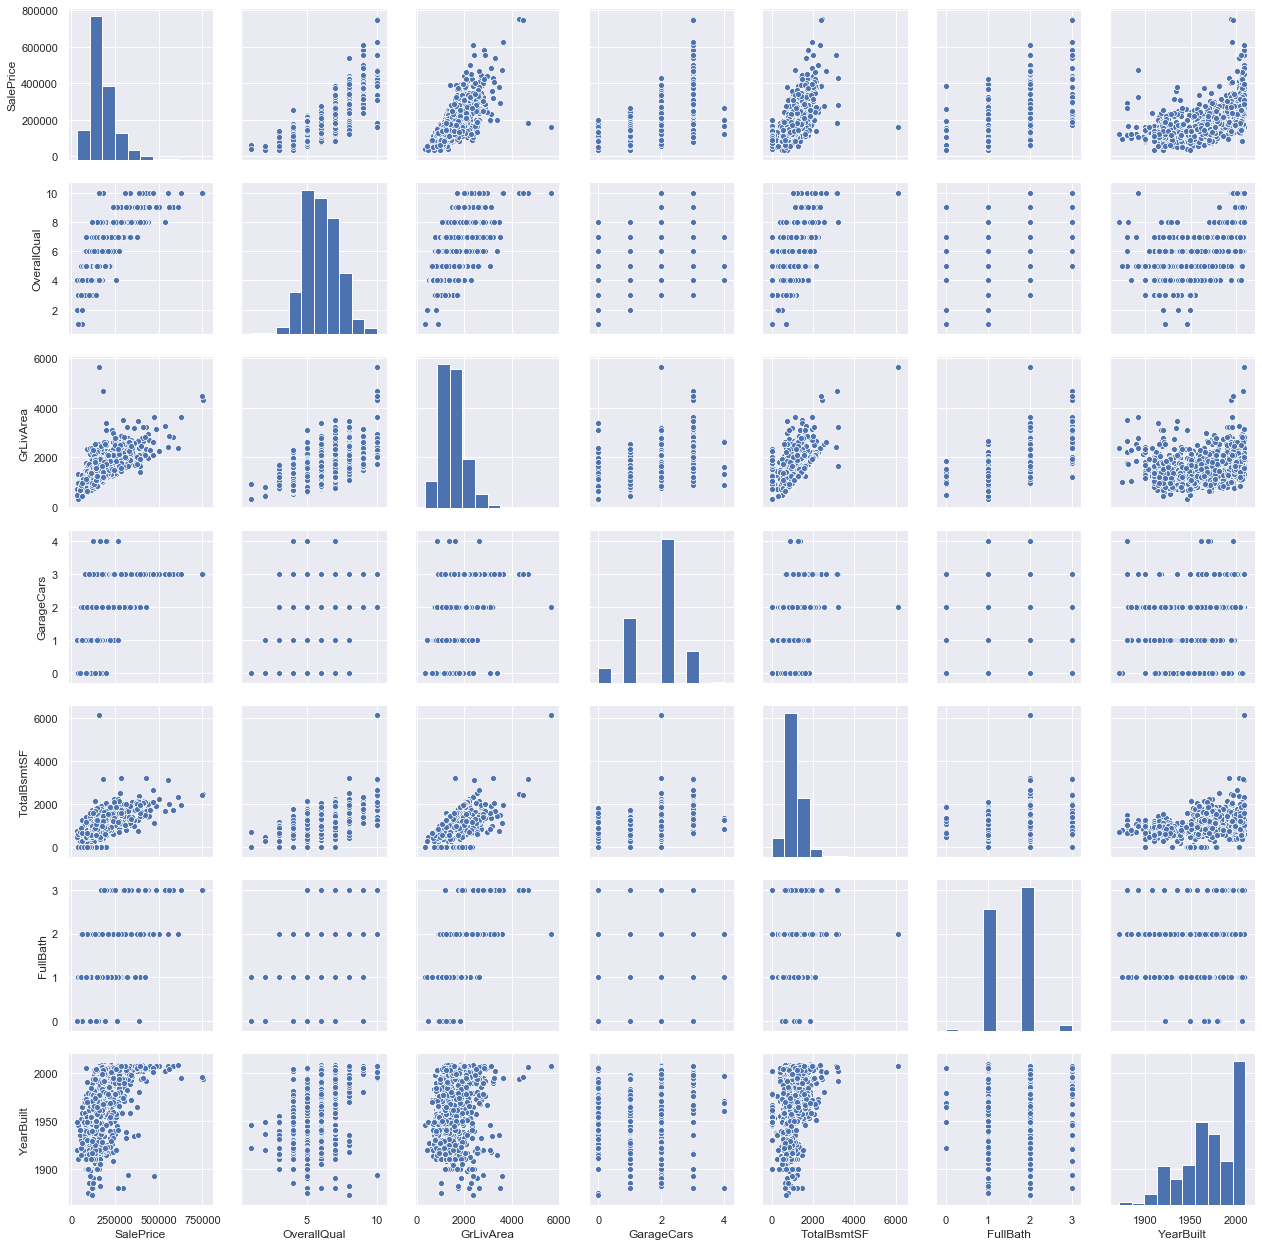

In [16]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

## Missing Data

In [17]:
#missing data
train_total = train.isnull().sum().sort_values(ascending=False)
train_percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
train_missing_data = pd.concat([train_total, train_percent], axis=1, keys=['Total', 'Percent'])
train_missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [18]:
#missing data in test
test_total = test.isnull().sum().sort_values(ascending=False)
test_percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
test_missing_data = pd.concat([test_total, test_percent], axis=1, keys=['Total', 'Percent'])
test_missing_data.head(35)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


## Imputing missing values
We impute them by proceeding sequentially through features with missing values
* **PoolQC** : data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.
* **MiscFeature** : data description says NA means "no misc feature".
* **Alley** : data description says NA means "no alley access".
* **Fence** : data description says NA means "no fence".
* **FireplaceQu** : data description says NA means "no fireplace".
* **GarageType, GarageFinish, GarageQual and GarageCond** : Replacing missing data with None
* **LotFrontage** : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can **fill in missing values by the median LotFrontage of the neighborhood.**
* **GarageYrBlt, GarageArea and GarageCars** : Replacing missing data with 0 (Since No garage = no cars in such garage.)
* **BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath** : missing values are likely zero for having no basement.
* **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2** : For all these categorical basement-related features, NaN means that there is no basement.
* **MasVnrArea and MasVnrType** : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
* **MSZoning (The general zoning classification)** : 'RL' is by far the most common value. So we can fill in missing values with 'RL'.
* **Functional** : data description says NA means typical.
* **Electrical** : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
* **KitchenQual**: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
* **Exterior1st and Exterior2nd** : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string.
* **SaleType** : Fill in again with most frequent which is "WD".
* **MSSubClass** : Na most likely means No building class. We can replace missing values with None


* **Utilities** : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, **this feature won't help in predictive modelling**. We can then safely remove it.

In [19]:
# Train Data Imputation

for col in ('PoolQC','MiscFeature','Alley','Fence','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MasVnrType','MSSubClass','FireplaceQu'):
    train[col] = train[col].fillna('None')
    

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF',
            'BsmtFullBath', 'BsmtHalfBath','MasVnrArea'):
    train[col] = train[col].fillna(0)
    

train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

train["Functional"] = train["Functional"].fillna("Typ")

train['MSZoning'] = train['MSZoning'].fillna(train['MSZoning'].mode()[0])
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
train['KitchenQual'] = train['KitchenQual'].fillna(train['KitchenQual'].mode()[0])
train['Exterior1st'] = train['Exterior1st'].fillna(train['Exterior1st'].mode()[0])
train['Exterior2nd'] = train['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])
train['SaleType'] = train['SaleType'].fillna(train['SaleType'].mode()[0])


train = train.drop(['Utilities'], axis=1)

In [20]:
train_total = train.isnull().sum().sort_values(ascending=False)
train_percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
train_missing_data = pd.concat([train_total, train_percent], axis=1, keys=['Total', 'Percent'])
train_missing_data.head(5)

,Total,Percent
SalePrice,0,0.0
SaleCondition,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0


In [21]:
# Test Data Imputation

for col in ('PoolQC','MiscFeature','Alley','Fence','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MasVnrType','MSSubClass','FireplaceQu'):
    test[col] = test[col].fillna('None')
    

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF',
            'BsmtFullBath', 'BsmtHalfBath','MasVnrArea'):
    test[col] = test[col].fillna(0)
    

test["LotFrontage"] = test.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

test["Functional"] = test["Functional"].fillna("Typ")

test['MSZoning'] = test['MSZoning'].fillna(test['MSZoning'].mode()[0])
test['Electrical'] = test['Electrical'].fillna(test['Electrical'].mode()[0])
test['KitchenQual'] = test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['Exterior1st'] = test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['Exterior2nd'] = test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['SaleType'] = test['SaleType'].fillna(test['SaleType'].mode()[0])


test = test.drop(['Utilities'], axis=1)

In [22]:
#missing data in test
test_total = test.isnull().sum().sort_values(ascending=False)
test_percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
test_missing_data = pd.concat([test_total, test_percent], axis=1, keys=['Total', 'Percent'])
test_missing_data.head(5)

,Total,Percent
SaleCondition,0,0.0
Foundation,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0


In [23]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


In [24]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,None,Reg,Lvl,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,None,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,None,MnPrv,None,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,None,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,None,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,None,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,None,MnPrv,None,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,None,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,None,None,None,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,None,IR1,HLS,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,None,None,None,0,1,2010,WD,Normal


In [25]:
# Print the number of unique levels in train and test data
train_unique = train.nunique().sort_values(ascending=False)
test_unique = test.nunique().sort_values(ascending=False)
unique_data = pd.concat([train_unique, test_unique], axis=1, keys=['Train', 'Test'],join="inner")
unique_data.head(100)

,Train,Test
Id,1460,1459
LotArea,1073,1106
GrLivArea,861,879
BsmtUnfSF,780,793
1stFlrSF,753,789
TotalBsmtSF,721,736
BsmtFinSF1,637,669
GarageArea,441,459
2ndFlrSF,417,407
MasVnrArea,327,303


### Converting the data into 'int' and 'category'

In [26]:
# Train data
train['LotFrontage'] = train['LotFrontage'].astype('int64')
train['MasVnrArea'] = train['MasVnrArea'].astype('int64')
train['GarageYrBlt'] = train['GarageYrBlt'].astype('int64')
# Test Data
test['LotFrontage'] = test['LotFrontage'].astype('int64')
test['MasVnrArea'] = test['MasVnrArea'].astype('int64')
test['GarageYrBlt'] = test['GarageYrBlt'].astype('int64')
test['BsmtFinSF1'] = test['BsmtFinSF1'].astype('int64')
test['BsmtFinSF2'] = test['BsmtFinSF2'].astype('int64')
test['BsmtUnfSF'] = test['BsmtUnfSF'].astype('int64')
test['TotalBsmtSF'] = test['TotalBsmtSF'].astype('int64')
test['GarageArea'] = test['GarageArea'].astype('int64')
test['BsmtFullBath'] = test['BsmtFullBath'].astype('int64')
test['BsmtHalfBath'] = test['BsmtHalfBath'].astype('int64')

In [27]:
for col in ('Alley','BldgType','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual',
            'CentralAir','Condition1','ExterCond','ExterQual','Fence','FireplaceQu','Foundation',
            'Functional','GarageCond','GarageFinish','GarageType','HeatingQC','KitchenQual',
            'LandContour','LandSlope','LotConfig','LotShape','MasVnrType','MSZoning',
            'Neighborhood','PavedDrive','RoofStyle','SaleCondition','SaleType','Street',
           'OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','HalfBath','TotRmsAbvGrd',
           'MoSold','YrSold') :
    train[col] = train[col].astype('category')
    test[col] = test[col].astype('category')


### Drop the columns because the unique levels are different with train and test

In [28]:
# Train data
train.drop(['Condition2','Electrical','Exterior1st','Exterior2nd','GarageQual',
            'Heating','HouseStyle','MiscFeature','PoolQC','RoofMatl',
           'MSSubClass','LowQualFinSF','FullBath','BedroomAbvGr','KitchenAbvGr',
            'Fireplaces','GarageCars','3SsnPorch','PoolArea','MiscVal','Id'], axis=1, inplace=True)
# Test data
test.drop(['Condition2','Electrical','Exterior1st','Exterior2nd','GarageQual',
            'Heating','HouseStyle','MiscFeature','PoolQC','RoofMatl',
           'MSSubClass','LowQualFinSF','FullBath','BedroomAbvGr','KitchenAbvGr',
            'Fireplaces','GarageCars','3SsnPorch','PoolArea','MiscVal','Id'], axis=1, inplace=True)

In [29]:
train.shape

(1460, 59)

In [30]:
test.shape

(1459, 58)

In [31]:
train.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,RL,65,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,7,5,2003,2003,Gable,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,Y,856,854,1710,1,0,1,Gd,8,Typ,None,Attchd,2003,RFn,548,TA,Y,0,61,0,0,None,2,2008,WD,Normal,208500
1,RL,80,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,6,8,1976,1976,Gable,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,Y,1262,0,1262,0,1,0,TA,6,Typ,TA,Attchd,1976,RFn,460,TA,Y,298,0,0,0,None,5,2007,WD,Normal,181500
2,RL,68,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,7,5,2001,2002,Gable,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,Y,920,866,1786,1,0,1,Gd,6,Typ,TA,Attchd,2001,RFn,608,TA,Y,0,42,0,0,None,9,2008,WD,Normal,223500
3,RL,60,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,7,5,1915,1970,Gable,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,Y,961,756,1717,1,0,0,Gd,7,Typ,Gd,Detchd,1998,Unf,642,TA,Y,0,35,272,0,None,2,2006,WD,Abnorml,140000
4,RL,84,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,8,5,2000,2000,Gable,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,Y,1145,1053,2198,1,0,1,Gd,9,Typ,TA,Attchd,2000,RFn,836,TA,Y,192,84,0,0,None,12,2008,WD,Normal,250000


In [32]:
test.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition
0,RH,80,11622,Pave,None,Reg,Lvl,Inside,Gtl,NAmes,Feedr,1Fam,5,6,1961,1961,Gable,None,0,TA,TA,CBlock,TA,TA,No,Rec,468,LwQ,144,270,882,TA,Y,896,0,896,0,0,0,TA,5,Typ,None,Attchd,1961,Unf,730,TA,Y,140,0,0,120,MnPrv,6,2010,WD,Normal
1,RL,81,14267,Pave,None,IR1,Lvl,Corner,Gtl,NAmes,Norm,1Fam,6,6,1958,1958,Hip,BrkFace,108,TA,TA,CBlock,TA,TA,No,ALQ,923,Unf,0,406,1329,TA,Y,1329,0,1329,0,0,1,Gd,6,Typ,None,Attchd,1958,Unf,312,TA,Y,393,36,0,0,None,6,2010,WD,Normal
2,RL,74,13830,Pave,None,IR1,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,5,5,1997,1998,Gable,None,0,TA,TA,PConc,Gd,TA,No,GLQ,791,Unf,0,137,928,Gd,Y,928,701,1629,0,0,1,TA,6,Typ,TA,Attchd,1997,Fin,482,TA,Y,212,34,0,0,MnPrv,3,2010,WD,Normal
3,RL,78,9978,Pave,None,IR1,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,6,6,1998,1998,Gable,BrkFace,20,TA,TA,PConc,TA,TA,No,GLQ,602,Unf,0,324,926,Ex,Y,926,678,1604,0,0,1,Gd,7,Typ,Gd,Attchd,1998,Fin,470,TA,Y,360,36,0,0,None,6,2010,WD,Normal
4,RL,43,5005,Pave,None,IR1,HLS,Inside,Gtl,StoneBr,Norm,TwnhsE,8,5,1992,1992,Gable,None,0,Gd,TA,PConc,Gd,TA,No,ALQ,263,Unf,0,1017,1280,Ex,Y,1280,0,1280,0,0,0,Gd,5,Typ,None,Attchd,1992,RFn,506,TA,Y,0,82,0,144,None,1,2010,WD,Normal


### Select Categorical Feature Indices

In [33]:
categorical_features_indices = np.where(train.dtypes != np.int64)[0]

In [34]:
categorical_features_indices

array([ 0,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 16, 17, 19, 20, 21,
       22, 23, 24, 25, 27, 31, 32, 36, 37, 38, 39, 40, 41, 42, 43, 45, 47,
       48, 53, 54, 55, 56, 57], dtype=int64)

## Split the data

In [35]:
from sklearn.model_selection import train_test_split

y = train["SalePrice"]
X = train.drop('SalePrice', axis=1)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.75, random_state=789)

## Model - CatBoostRegressor

In [36]:
from catboost import CatBoostRegressor

In [37]:
model_1=CatBoostRegressor(loss_function='RMSE')
model_1.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_validation, y_validation),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.046874
0:	learn: 79057.2241883	test: 71633.4096966	best: 71633.4096966 (0)	total: 137ms	remaining: 2m 16s
1:	learn: 76687.7562302	test: 69355.4212247	best: 69355.4212247 (1)	total: 233ms	remaining: 1m 56s
2:	learn: 74758.2513354	test: 67516.6512851	best: 67516.6512851 (2)	total: 332ms	remaining: 1m 50s
3:	learn: 72885.0883119	test: 65650.3902796	best: 65650.3902796 (3)	total: 424ms	remaining: 1m 45s
4:	learn: 71112.0343202	test: 63733.5968067	best: 63733.5968067 (4)	total: 512ms	remaining: 1m 41s
5:	learn: 69443.9956659	test: 62201.1114487	best: 62201.1114487 (5)	total: 588ms	remaining: 1m 37s
6:	learn: 67530.4338409	test: 60366.4287549	best: 60366.4287549 (6)	total: 677ms	remaining: 1m 36s
7:	learn: 65889.8587118	test: 58798.5215552	best: 58798.5215552 (7)	total: 774ms	remaining: 1m 35s
8:	learn: 64112.2709361	test: 57105.3760643	best: 57105.3760643 (8)	total: 880ms	remaining: 1m 36s
9:	learn: 62433.1044670	test: 55706.6825955	best: 55706.6825955 (9)	total: 990m

83:	learn: 24340.8524639	test: 28004.0623327	best: 28004.0623327 (83)	total: 7.87s	remaining: 1m 25s
84:	learn: 24204.4782699	test: 27936.7394577	best: 27936.7394577 (84)	total: 7.96s	remaining: 1m 25s
85:	learn: 24053.3858394	test: 27875.8294767	best: 27875.8294767 (85)	total: 8.07s	remaining: 1m 25s
86:	learn: 23953.7815305	test: 27817.8971217	best: 27817.8971217 (86)	total: 8.19s	remaining: 1m 25s
87:	learn: 23862.0374388	test: 27848.3604304	best: 27817.8971217 (86)	total: 8.29s	remaining: 1m 25s
88:	learn: 23712.1270250	test: 27775.4209625	best: 27775.4209625 (88)	total: 8.39s	remaining: 1m 25s
89:	learn: 23590.4891571	test: 27749.2038620	best: 27749.2038620 (89)	total: 8.5s	remaining: 1m 25s
90:	learn: 23462.2215096	test: 27676.2444571	best: 27676.2444571 (90)	total: 8.59s	remaining: 1m 25s
91:	learn: 23396.3667248	test: 27624.6615398	best: 27624.6615398 (91)	total: 8.67s	remaining: 1m 25s
92:	learn: 23319.8013531	test: 27602.3591110	best: 27602.3591110 (92)	total: 8.75s	remaining

163:	learn: 18578.4000888	test: 25890.5174794	best: 25877.5518663 (162)	total: 15.2s	remaining: 1m 17s
164:	learn: 18515.9459238	test: 25847.4865816	best: 25847.4865816 (164)	total: 15.2s	remaining: 1m 17s
165:	learn: 18467.7474949	test: 25819.8081549	best: 25819.8081549 (165)	total: 15.3s	remaining: 1m 16s
166:	learn: 18437.4673472	test: 25813.6539073	best: 25813.6539073 (166)	total: 15.4s	remaining: 1m 16s
167:	learn: 18383.3805130	test: 25812.8107095	best: 25812.8107095 (167)	total: 15.5s	remaining: 1m 16s
168:	learn: 18344.3149689	test: 25796.6392972	best: 25796.6392972 (168)	total: 15.6s	remaining: 1m 16s
169:	learn: 18270.3380083	test: 25760.9415356	best: 25760.9415356 (169)	total: 15.7s	remaining: 1m 16s
170:	learn: 18218.3862835	test: 25720.0501480	best: 25720.0501480 (170)	total: 15.8s	remaining: 1m 16s
171:	learn: 18180.5643513	test: 25669.8727779	best: 25669.8727779 (171)	total: 15.8s	remaining: 1m 16s
172:	learn: 18133.0632035	test: 25650.9655169	best: 25650.9655169 (172)	t

243:	learn: 16149.4795745	test: 24800.2945733	best: 24799.7589368 (240)	total: 22.4s	remaining: 1m 9s
244:	learn: 16132.8933664	test: 24792.9053878	best: 24792.9053878 (244)	total: 22.5s	remaining: 1m 9s
245:	learn: 16101.1116775	test: 24799.1537741	best: 24792.9053878 (244)	total: 22.6s	remaining: 1m 9s
246:	learn: 16055.0071856	test: 24776.9999708	best: 24776.9999708 (246)	total: 22.7s	remaining: 1m 9s
247:	learn: 15989.9075074	test: 24744.1349497	best: 24744.1349497 (247)	total: 22.8s	remaining: 1m 9s
248:	learn: 15958.2824503	test: 24729.1474709	best: 24729.1474709 (248)	total: 22.9s	remaining: 1m 8s
249:	learn: 15944.6035158	test: 24728.8961787	best: 24728.8961787 (249)	total: 23s	remaining: 1m 8s
250:	learn: 15900.1506396	test: 24711.0139038	best: 24711.0139038 (250)	total: 23s	remaining: 1m 8s
251:	learn: 15883.2788478	test: 24699.1942755	best: 24699.1942755 (251)	total: 23.1s	remaining: 1m 8s
252:	learn: 15850.2379197	test: 24694.4438040	best: 24694.4438040 (252)	total: 23.2s	r

325:	learn: 14353.9996018	test: 24294.2116918	best: 24270.2046978 (320)	total: 30.2s	remaining: 1m 2s
326:	learn: 14346.8367860	test: 24293.8146753	best: 24270.2046978 (320)	total: 30.3s	remaining: 1m 2s
327:	learn: 14334.2744313	test: 24286.3595085	best: 24270.2046978 (320)	total: 30.3s	remaining: 1m 2s
328:	learn: 14308.1469682	test: 24268.4645872	best: 24268.4645872 (328)	total: 30.4s	remaining: 1m 1s
329:	learn: 14292.1420824	test: 24258.1159918	best: 24258.1159918 (329)	total: 30.5s	remaining: 1m 1s
330:	learn: 14252.1835240	test: 24259.7660739	best: 24258.1159918 (329)	total: 30.5s	remaining: 1m 1s
331:	learn: 14219.6277535	test: 24242.1452663	best: 24242.1452663 (331)	total: 30.6s	remaining: 1m 1s
332:	learn: 14204.5922390	test: 24231.5011164	best: 24231.5011164 (332)	total: 30.7s	remaining: 1m 1s
333:	learn: 14193.0151483	test: 24223.7006148	best: 24223.7006148 (333)	total: 30.8s	remaining: 1m 1s
334:	learn: 14168.9983892	test: 24215.8011446	best: 24215.8011446 (334)	total: 30.

406:	learn: 12979.2524400	test: 23974.5230473	best: 23966.2068912 (389)	total: 37.4s	remaining: 54.5s
407:	learn: 12963.0391481	test: 23963.6937274	best: 23963.6937274 (407)	total: 37.5s	remaining: 54.4s
408:	learn: 12954.7135771	test: 23963.3757322	best: 23963.3757322 (408)	total: 37.6s	remaining: 54.3s
409:	learn: 12943.6194838	test: 23971.4037308	best: 23963.3757322 (408)	total: 37.7s	remaining: 54.3s
410:	learn: 12934.6330938	test: 23970.0587424	best: 23963.3757322 (408)	total: 37.8s	remaining: 54.2s
411:	learn: 12931.2969624	test: 23974.7405124	best: 23963.3757322 (408)	total: 37.8s	remaining: 54s
412:	learn: 12919.0216062	test: 23976.4229097	best: 23963.3757322 (408)	total: 37.9s	remaining: 53.9s
413:	learn: 12898.8287958	test: 23979.5902998	best: 23963.3757322 (408)	total: 38s	remaining: 53.8s
414:	learn: 12889.7170395	test: 23963.0379487	best: 23963.0379487 (414)	total: 38.1s	remaining: 53.7s
415:	learn: 12869.0853702	test: 23957.9862158	best: 23957.9862158 (415)	total: 38.2s	r

489:	learn: 11939.6668325	test: 23893.4946359	best: 23887.5574691 (484)	total: 45.3s	remaining: 47.1s
490:	learn: 11933.8997138	test: 23889.6456535	best: 23887.5574691 (484)	total: 45.4s	remaining: 47s
491:	learn: 11923.5805878	test: 23888.8606801	best: 23887.5574691 (484)	total: 45.5s	remaining: 46.9s
492:	learn: 11911.6777005	test: 23885.7343034	best: 23885.7343034 (492)	total: 45.5s	remaining: 46.8s
493:	learn: 11906.5379209	test: 23886.3979835	best: 23885.7343034 (492)	total: 45.6s	remaining: 46.7s
494:	learn: 11906.0077913	test: 23886.4028735	best: 23885.7343034 (492)	total: 45.7s	remaining: 46.7s
495:	learn: 11891.3779759	test: 23892.3188888	best: 23885.7343034 (492)	total: 45.8s	remaining: 46.6s
496:	learn: 11874.0914241	test: 23879.0288038	best: 23879.0288038 (496)	total: 45.9s	remaining: 46.5s
497:	learn: 11863.9321848	test: 23881.0009509	best: 23879.0288038 (496)	total: 46s	remaining: 46.4s
498:	learn: 11860.9775409	test: 23881.6687368	best: 23879.0288038 (496)	total: 46.1s	r

572:	learn: 11039.8686570	test: 23731.2874634	best: 23731.2874634 (572)	total: 53s	remaining: 39.5s
573:	learn: 11028.0428297	test: 23732.3716199	best: 23731.2874634 (572)	total: 53.1s	remaining: 39.4s
574:	learn: 11023.0597398	test: 23733.3542994	best: 23731.2874634 (572)	total: 53.2s	remaining: 39.3s
575:	learn: 11020.3616307	test: 23732.5845055	best: 23731.2874634 (572)	total: 53.3s	remaining: 39.3s
576:	learn: 10999.9930969	test: 23728.1774009	best: 23728.1774009 (576)	total: 53.4s	remaining: 39.2s
577:	learn: 10998.6176066	test: 23727.6214609	best: 23727.6214609 (577)	total: 53.5s	remaining: 39.1s
578:	learn: 10987.1961542	test: 23721.4397527	best: 23721.4397527 (578)	total: 53.6s	remaining: 39s
579:	learn: 10973.8198625	test: 23730.5669678	best: 23721.4397527 (578)	total: 53.7s	remaining: 38.9s
580:	learn: 10970.4009605	test: 23733.7018022	best: 23721.4397527 (578)	total: 53.8s	remaining: 38.8s
581:	learn: 10945.3811960	test: 23736.0177148	best: 23721.4397527 (578)	total: 53.9s	r

654:	learn: 10182.2965443	test: 23687.3425528	best: 23674.9920853 (619)	total: 1m	remaining: 32s
655:	learn: 10181.6821748	test: 23687.1862842	best: 23674.9920853 (619)	total: 1m	remaining: 31.9s
656:	learn: 10174.4683141	test: 23696.7875314	best: 23674.9920853 (619)	total: 1m	remaining: 31.8s
657:	learn: 10146.5840991	test: 23694.6598845	best: 23674.9920853 (619)	total: 1m	remaining: 31.7s
658:	learn: 10133.7812970	test: 23693.4962673	best: 23674.9920853 (619)	total: 1m 1s	remaining: 31.6s
659:	learn: 10130.4534196	test: 23693.6458451	best: 23674.9920853 (619)	total: 1m 1s	remaining: 31.5s
660:	learn: 10129.8469279	test: 23692.9282723	best: 23674.9920853 (619)	total: 1m 1s	remaining: 31.4s
661:	learn: 10112.2398379	test: 23689.7155469	best: 23674.9920853 (619)	total: 1m 1s	remaining: 31.4s
662:	learn: 10110.0838483	test: 23689.3426260	best: 23674.9920853 (619)	total: 1m 1s	remaining: 31.3s
663:	learn: 10100.7992487	test: 23687.2395929	best: 23674.9920853 (619)	total: 1m 1s	remaining: 

736:	learn: 9550.2766951	test: 23560.6726110	best: 23548.1517798 (727)	total: 1m 9s	remaining: 24.8s
737:	learn: 9540.2222917	test: 23558.1629459	best: 23548.1517798 (727)	total: 1m 9s	remaining: 24.7s
738:	learn: 9535.0914476	test: 23556.3044238	best: 23548.1517798 (727)	total: 1m 9s	remaining: 24.6s
739:	learn: 9531.0140069	test: 23557.0752206	best: 23548.1517798 (727)	total: 1m 9s	remaining: 24.5s
740:	learn: 9513.1671912	test: 23552.2034641	best: 23548.1517798 (727)	total: 1m 9s	remaining: 24.4s
741:	learn: 9498.7472398	test: 23547.1952031	best: 23547.1952031 (741)	total: 1m 10s	remaining: 24.4s
742:	learn: 9488.9464342	test: 23552.6698509	best: 23547.1952031 (741)	total: 1m 10s	remaining: 24.3s
743:	learn: 9474.1951934	test: 23552.9506275	best: 23547.1952031 (741)	total: 1m 10s	remaining: 24.2s
744:	learn: 9471.1843560	test: 23555.6014408	best: 23547.1952031 (741)	total: 1m 10s	remaining: 24.1s
745:	learn: 9461.0827273	test: 23551.5337430	best: 23547.1952031 (741)	total: 1m 10s	re

819:	learn: 8864.6238480	test: 23554.1646181	best: 23533.7036050 (755)	total: 1m 18s	remaining: 17.3s
820:	learn: 8854.0098007	test: 23554.4757189	best: 23533.7036050 (755)	total: 1m 18s	remaining: 17.2s
821:	learn: 8848.9304532	test: 23554.5629496	best: 23533.7036050 (755)	total: 1m 18s	remaining: 17.1s
822:	learn: 8847.4128057	test: 23553.6166250	best: 23533.7036050 (755)	total: 1m 18s	remaining: 17s
823:	learn: 8845.1078768	test: 23552.0380696	best: 23533.7036050 (755)	total: 1m 19s	remaining: 16.9s
824:	learn: 8840.0525863	test: 23548.4283992	best: 23533.7036050 (755)	total: 1m 19s	remaining: 16.8s
825:	learn: 8839.1834988	test: 23548.1677392	best: 23533.7036050 (755)	total: 1m 19s	remaining: 16.7s
826:	learn: 8834.4034408	test: 23547.7389808	best: 23533.7036050 (755)	total: 1m 19s	remaining: 16.6s
827:	learn: 8823.6615167	test: 23540.5426842	best: 23533.7036050 (755)	total: 1m 19s	remaining: 16.5s
828:	learn: 8820.4103095	test: 23540.0239822	best: 23533.7036050 (755)	total: 1m 19s

902:	learn: 8331.2797763	test: 23533.8049987	best: 23521.8697132 (850)	total: 1m 26s	remaining: 9.34s
903:	learn: 8331.1161505	test: 23533.6250318	best: 23521.8697132 (850)	total: 1m 26s	remaining: 9.24s
904:	learn: 8317.2486109	test: 23536.5339431	best: 23521.8697132 (850)	total: 1m 27s	remaining: 9.14s
905:	learn: 8316.4042974	test: 23537.3454823	best: 23521.8697132 (850)	total: 1m 27s	remaining: 9.04s
906:	learn: 8312.6846964	test: 23537.8873212	best: 23521.8697132 (850)	total: 1m 27s	remaining: 8.95s
907:	learn: 8304.1428901	test: 23533.1963077	best: 23521.8697132 (850)	total: 1m 27s	remaining: 8.86s
908:	learn: 8301.5302595	test: 23531.1738084	best: 23521.8697132 (850)	total: 1m 27s	remaining: 8.76s
909:	learn: 8287.0476234	test: 23526.7408425	best: 23521.8697132 (850)	total: 1m 27s	remaining: 8.66s
910:	learn: 8283.3294168	test: 23530.4877104	best: 23521.8697132 (850)	total: 1m 27s	remaining: 8.56s
911:	learn: 8273.4424099	test: 23529.8486267	best: 23521.8697132 (850)	total: 1m 2

984:	learn: 7784.0885641	test: 23520.4720286	best: 23516.1912887 (980)	total: 1m 35s	remaining: 1.46s
985:	learn: 7782.5211964	test: 23522.8087687	best: 23516.1912887 (980)	total: 1m 35s	remaining: 1.36s
986:	learn: 7781.3969464	test: 23522.0584762	best: 23516.1912887 (980)	total: 1m 35s	remaining: 1.26s
987:	learn: 7775.9101636	test: 23523.0754528	best: 23516.1912887 (980)	total: 1m 36s	remaining: 1.17s
988:	learn: 7759.6883045	test: 23514.2939372	best: 23514.2939372 (988)	total: 1m 36s	remaining: 1.07s
989:	learn: 7751.4898835	test: 23514.5610287	best: 23514.2939372 (988)	total: 1m 36s	remaining: 972ms
990:	learn: 7751.3544993	test: 23514.3335009	best: 23514.2939372 (988)	total: 1m 36s	remaining: 875ms
991:	learn: 7744.1723679	test: 23512.0417339	best: 23512.0417339 (991)	total: 1m 36s	remaining: 778ms
992:	learn: 7742.3037270	test: 23509.6187172	best: 23509.6187172 (992)	total: 1m 36s	remaining: 680ms
993:	learn: 7735.8762830	test: 23504.5441814	best: 23504.5441814 (993)	total: 1m 3

In [38]:
pred =model_1.predict(test)

In [40]:
submission = pd.DataFrame()
submission['Id'] = sample_submission.Id
submission['SalePrice'] = pred
submission.to_csv('submission.csv', index=False)
submission.head(5)

,Id,SalePrice
0,1461,129285.879710
1,1462,165460.321801
2,1463,183196.422461
3,1464,198177.643858
4,1465,184666.293442
